In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [8]:
from utils.test_utils import plot_results, load_logs

In [9]:
save_dirs = ["../results/simulation/220320_1458","../results/simulation/220320_1502"]

In [18]:
import copy
def average_performance(save_dirs):
    for i,sd in enumerate(save_dirs):
        loss_gs, acc_gs, loss_log, acc_log = load_logs(sd)
        if i==0:
            lossgs = copy.deepcopy(loss_gs)
            accgs = copy.deepcopy(acc_gs)
            losslog = copy.deepcopy(loss_log)
            acclog = copy.deepcopy(acc_log)
        else:
            for gk in lossgs.keys():
                for gik in lossgs[gk].keys():
                    lossgs[gk][gik] = np.row_stack((lossgs[gk][gik],loss_gs[gk][gik]))
                    accgs[gk][gik] = np.row_stack((accgs[gk][gik],acc_gs[gk][gik]))
            for gk in losslog.keys():
                losslog[gk] = np.row_stack((losslog[gk], loss_log[gk]))
                acclog[gk] = np.row_stack((acclog[gk], acc_log[gk]))
                
    for gk in lossgs.keys():
        for gik in lossgs[gk].keys():
            lossgs[gk][gik] = np.mean(lossgs[gk][gik],axis=0)
            accgs[gk][gik] = np.mean(accgs[gk][gik],axis=0)
    for gk in losslog.keys():
        losslog[gk] = np.mean(losslog[gk], axis=0)
        acclog[gk] = np.mean(acclog[gk], axis=0)
    return lossgs, accgs, losslog, acclog

In [19]:
lossgs, accgs, losslog, acclog = average_performance(save_dirs)

load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs
load loss group logs
load accuracy group logs
load average/worst loss logs
load average/worst accuracy logs


In [20]:
from utils.test_utils import plot_results

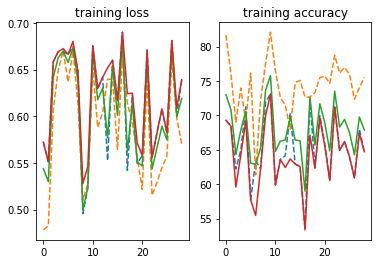

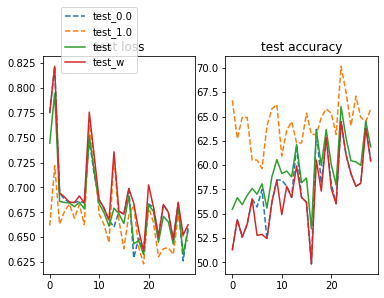

In [21]:
plot_results(lossgs, accgs, losslog, acclog)